C:\Users\maxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,674 (319.04 KB)

 Trainable params: 81,674 (319.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 72s 41ms/step - accuracy: 0.6453 - loss: 1.0867 - val_accuracy: 0.9533 - val_loss: 0.1623
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9537 - loss: 0.1528 - val_accuracy: 0.9623 - val_loss: 0.1219
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.9684 - loss: 0.1057 - val_accuracy: 0.9731 - val_loss: 0.0897
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 29ms/step - accuracy: 0.9763 - loss: 0.0764 - val_accuracy: 0.9817 - val_loss: 0.0653
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 31ms/step - accuracy: 0.9817 - loss: 0.0604 - val_accuracy: 0.9787 - val_loss: 0.0727
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.9848 - val_loss: 0.0507
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9867 - loss: 0.0408 - val_accuracy: 0.9808 - val_loss: 0.0684
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9869 -

NameError: name 'y_predicted_labels' is not defined

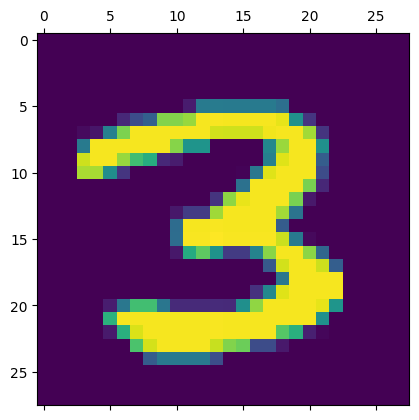

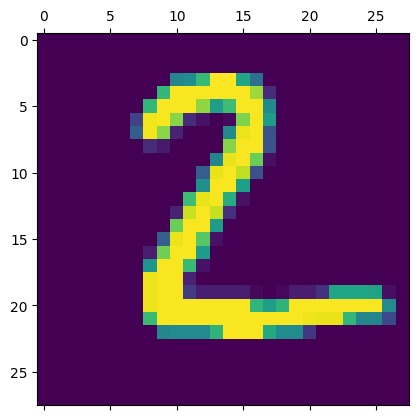

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
len(x_train)
len(x_test)
x_train[0].shape
x_train[50000].shape
x_test[0].shape
x_train[0]
plt.matshow(x_train[7841])
y_train[7841]
y_train[:15]
x_train.shape
x_train = x_train / 255
x_test = x_test
x_train[0]
# Reshape the data to fit the LSTM input shape
timesteps = x_train.shape[1]
input_dim= x_train.shape[2]
x_train = x_train.reshape(-1, timesteps, input_dim)
x_test = x_test.reshape(-1, timesteps, input_dim)
x_train.shape
x_train[0]
# Build the LSTM model
model = Sequential([
LSTM(units=128, activation ='relu', input_shape=(timesteps, input_dim)),Dense(units=10, activation = 'softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Corrected loss function name
              metrics=['accuracy'])
model.summary()
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.matshow(x_test[1])
y_predicted = model.predict(x_test)
y_predicted[1]
np.argmax(y_predicted[1])
y_test[:5]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.ylabel('Truth')

